# **Import the required packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray
from math import sqrt

# **Import the image**

**#Convert the image to Binary**

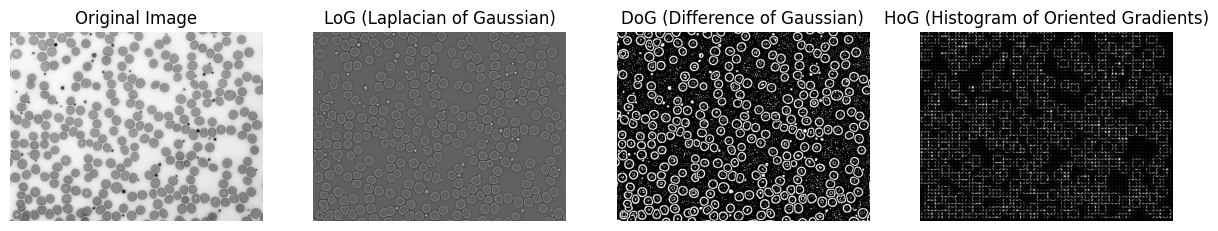

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load the image (Replace 'image.jpg' with your actual image file)
image = cv2.imread('bloodcells.png', cv2.IMREAD_GRAYSCALE)

### 1. Laplacian of Gaussian (LoG)
log = cv2.GaussianBlur(image, (5, 5), 0)
log = cv2.Laplacian(log, cv2.CV_64F)

### 2. Difference of Gaussian (DoG)
gaussian1 = cv2.GaussianBlur(image, (5, 5), 1)
gaussian2 = cv2.GaussianBlur(image, (5, 5), 3)
dog = gaussian1 - gaussian2

### 3. Histogram of Oriented Gradients (HoG)
hog_features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display results
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(log, cmap='gray')
axes[1].set_title("LoG (Laplacian of Gaussian)")
axes[2].imshow(dog, cmap='gray')
axes[2].set_title("DoG (Difference of Gaussian)")
axes[3].imshow(hog_image, cmap='gray')
axes[3].set_title("HoG (Histogram of Oriented Gradients)")

for ax in axes:
    ax.axis("off")

plt.show()


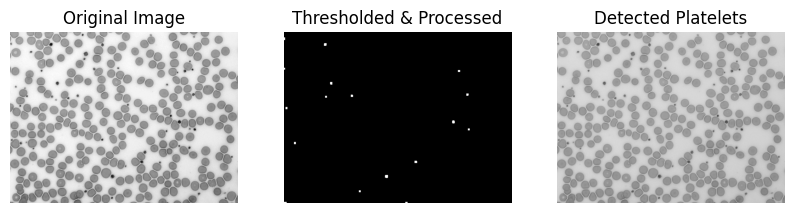

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('bloodcells.png', cv2.IMREAD_GRAYSCALE)

# **Step 1: Apply Adaptive Thresholding (To Highlight Platelets)**
thresholded = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY_INV, 11, 2)

# **Step 2: Morphological Operations to Separate Blobs**
kernel = np.ones((3,3), np.uint8)
morph = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)

# **Step 3: Setup Blob Detector Parameters**
params = cv2.SimpleBlobDetector_Params()

# **Filter by Area (Platelets are Small)**
params.filterByArea = True
params.minArea = 50
params.maxArea = 200  # Adjust if necessary

# **Filter by Circularity (Platelets are More Circular)**
params.filterByCircularity = True
params.minCircularity = 0.7  

# **Filter by Convexity (To Exclude Irregular RBCs)**
params.filterByConvexity = True
params.minConvexity = 0.85  

# **Filter by Color (Choose Based on Image Type)**
params.filterByColor = True
params.blobColor = 255  # If platelets appear dark, change to 0

# **Create Detector and Detect Blobs**
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(morph)

# **Draw Keypoints on Original Image**
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for keypoint in keypoints:
    x, y = int(keypoint.pt[0]), int(keypoint.pt[1])
    cv2.circle(output, (x, y), int(keypoint.size / 2), (255, 0, 0), 2)

# **Display Results using Matplotlib**
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(morph, cmap='gray')
plt.title("Thresholded & Processed")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Platelets")
plt.axis("off")

plt.show()


# **Create structural element for Erosion and Dilution**

In [16]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.segmentation import clear_border
from skimage.morphology import label

from skimage.io import imread, imshow
from skimage.color import rgb2gray
image_name = 'bloodcells.png'
image = imageio.imread(image_name)[:,:,:3]
im = rgb2gray(image)

C:\Users\anand\AppData\Local\Temp\ipykernel_34560\1195341041.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_name)[:,:,:3]


C:\Users\anand\AppData\Local\Temp\ipykernel_34560\1346614441.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(im_bw, cmap='gray');
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


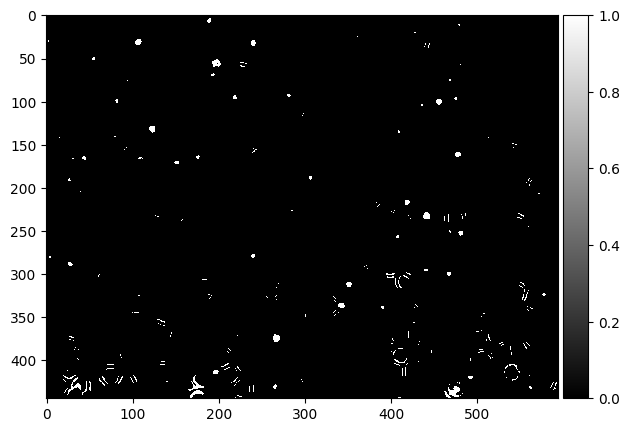

In [17]:
im_bw = (im < 0.5) * 1
im_mask = im < 0.5
imshow(im_bw, cmap='gray');

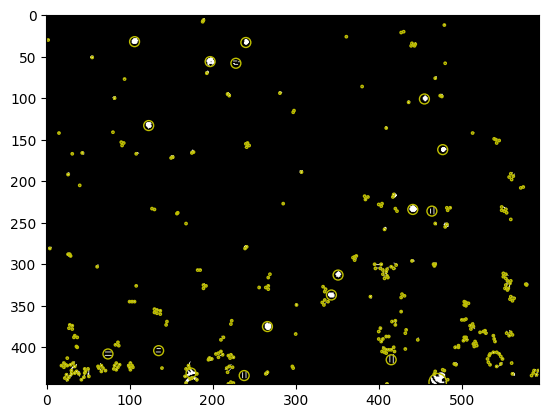

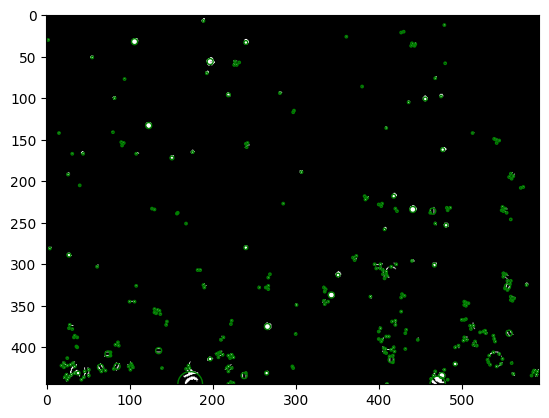

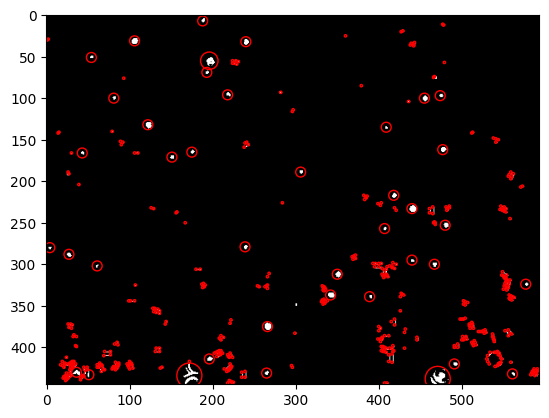

In [18]:
from skimage.feature import blob_log

blobs = blob_log(im_mask, max_sigma=30, num_sigma=10, threshold=0.1)

fig, ax = plt.subplots()
ax.imshow(im_bw, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='y', fill=False))
plt.show()

#DoG

from skimage.feature import blob_dog

blobs = blob_dog(im_mask, max_sigma=30, threshold=.1)

fig, ax = plt.subplots()
ax.imshow(im_bw, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='g', fill=False))
plt.show()


#DoH

from skimage.feature import blob_doh

blobs = blob_doh(im_mask, max_sigma=30, threshold=.01)

fig, ax = plt.subplots()
ax.imshow(im_bw, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', fill=False))
plt.show()

In [ ]:
# Standard imports
import cv2
import numpy as np;

# Read image
im = cv2.imread("candy.png", cv2.IMREAD_GRAYSCALE)



# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

#filter by color
params.filterByColor = True
params.blobColor = 255

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.08

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
   detector = cv2.SimpleBlobDetector(params)
else : 
   detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle        corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]),   (0,0,255),     cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
cv2.imwrite("candy.png",im_with_keypoints)
print("Total of objects")
print(len(keypoints))

Total of objects
5


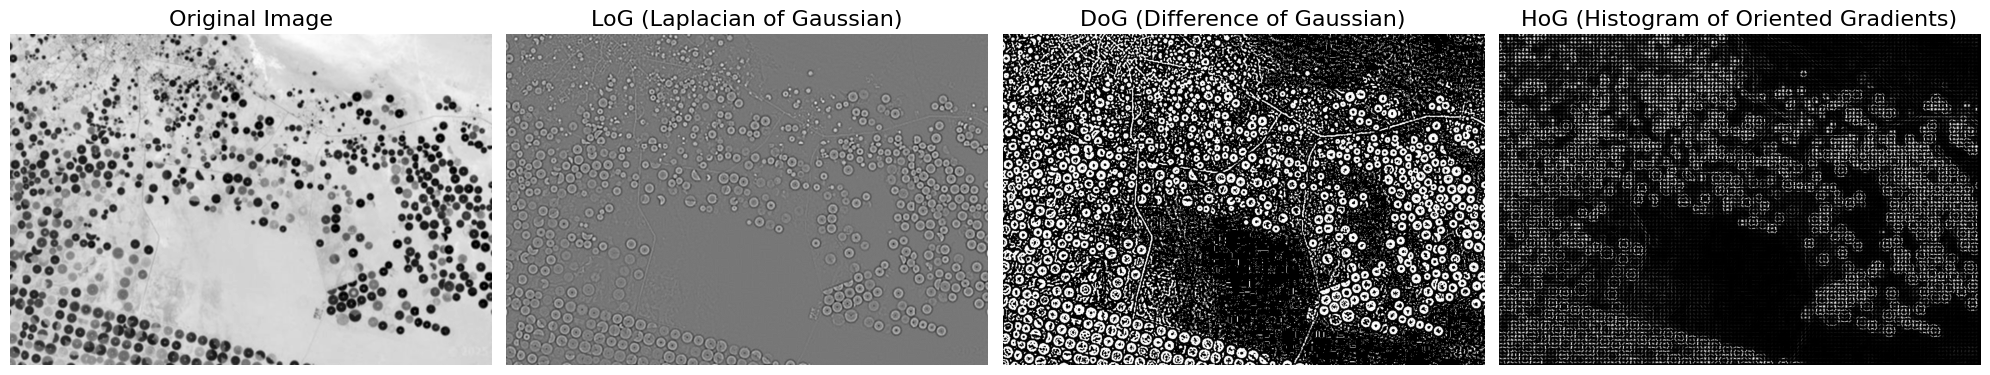

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load the image (Replace 'bloodcells.png' with your actual image file)
image = cv2.imread('satellite.png', cv2.IMREAD_GRAYSCALE)

# Resize image to a larger size (optional)
scale_factor = 2  # Increase this value to make images larger
image = cv2.resize(image, (image.shape[1] * scale_factor, image.shape[0] * scale_factor))

### 1. Laplacian of Gaussian (LoG)
log = cv2.GaussianBlur(image, (5, 5), 0)
log = cv2.Laplacian(log, cv2.CV_64F)

### 2. Difference of Gaussian (DoG)
gaussian1 = cv2.GaussianBlur(image, (5, 5), 1)
gaussian2 = cv2.GaussianBlur(image, (5, 5), 3)
dog = gaussian1 - gaussian2

### 3. Histogram of Oriented Gradients (HoG)
hog_features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display results with larger figure size
fig, axes = plt.subplots(1, 4, figsize=(20, 10))  # Increased figsize for larger output

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image", fontsize=16)
axes[1].imshow(log, cmap='gray')
axes[1].set_title("LoG (Laplacian of Gaussian)", fontsize=16)
axes[2].imshow(dog, cmap='gray')
axes[2].set_title("DoG (Difference of Gaussian)", fontsize=16)
axes[3].imshow(hog_image, cmap='gray')
axes[3].set_title("HoG (Histogram of Oriented Gradients)", fontsize=16)

for ax in axes:
    ax.axis("off")

plt.tight_layout()  # Ensures images are properly spaced
plt.show()


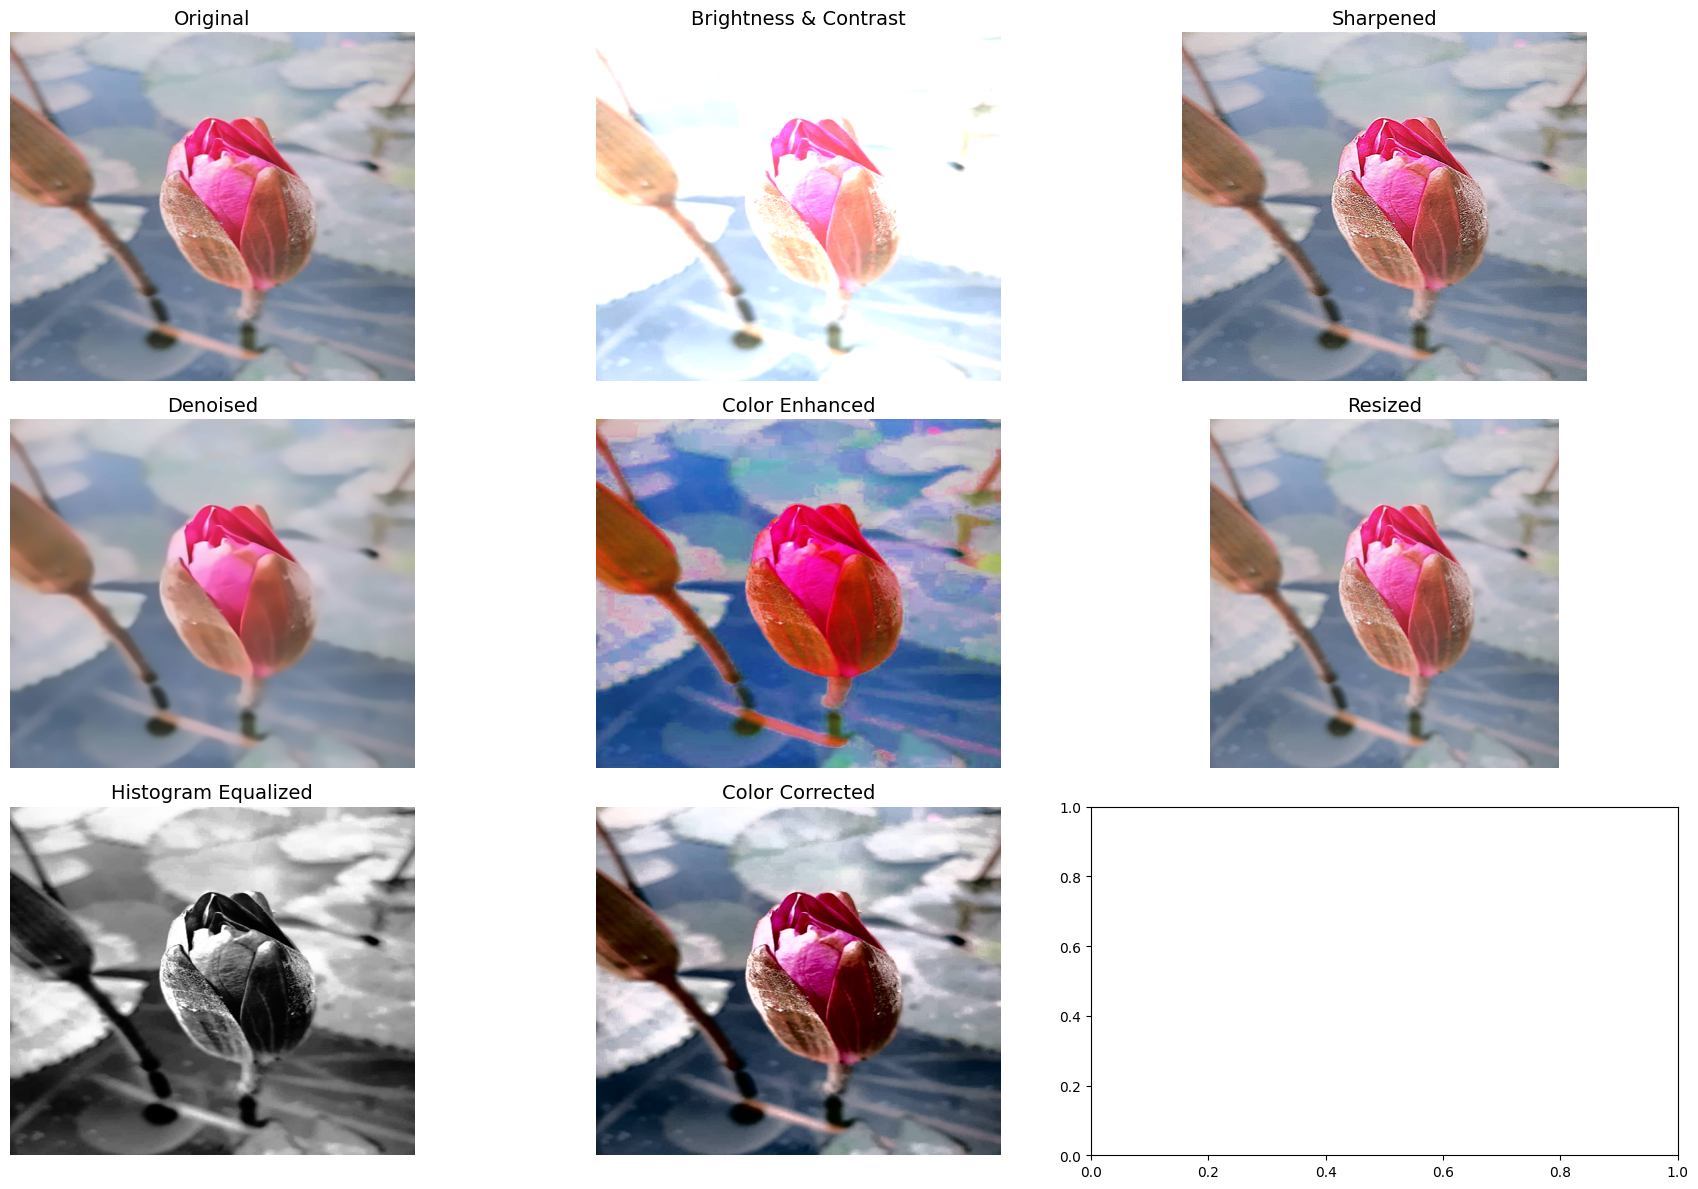

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (Replace 'image.jpg' with your actual image file)
image = cv2.imread('flower.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for some operations

### 1. Adjusting Brightness & Contrast
def adjust_brightness_contrast(img, alpha=1.5, beta=50):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

bright_contrast = adjust_brightness_contrast(image)

### 2. Sharpening Images
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

sharpened = cv2.filter2D(image, -1, sharpening_kernel)

### 3. Removing Noise (Denoising)
denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

### 4. Enhancing Color
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv[:, :, 1] = cv2.equalizeHist(hsv[:, :, 1])  # Equalize only the Saturation channel
enhanced_color = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

### 5. Image Resizing & Scaling
resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_CUBIC)

### 6. Inverse Transform (Fourier Transform & Inverse FFT)
def inverse_fourier(img):
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

    # Inverse DFT
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_back = cv2.idft(dft_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    return magnitude_spectrum, img_back

magnitude_spectrum, inverse_transformed = inverse_fourier(gray)

### 7. Equalizing Histograms
equalized_gray = cv2.equalizeHist(gray)

# ### 8. Super-Resolution (Using OpenCV DNN)
# sr = cv2.dnn_superres.DnnSuperResImpl_create()
# sr.readModel("EDSR_x4.pb")  # Download a model like EDSR, ESPCN, etc.
# sr.setModel("edsr", 4)
# super_res_image = sr.upsample(image)

### 9. Color Correction (White Balance)
def color_correction(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)  # Apply histogram equalization on the L channel
    lab = cv2.merge((l, a, b))
    corrected = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return corrected

color_corrected = color_correction(image)

# Display Results
titles = ['Original', 'Brightness & Contrast', 'Sharpened', 'Denoised',
          'Color Enhanced', 'Resized', 'Histogram Equalized', 'Color Corrected']

images = [image, bright_contrast, sharpened, denoised, enhanced_color,
          resized, equalized_gray, color_corrected]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))

for ax, img, title in zip(axes.ravel(), images, titles):
    if len(img.shape) == 2:
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title, fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()


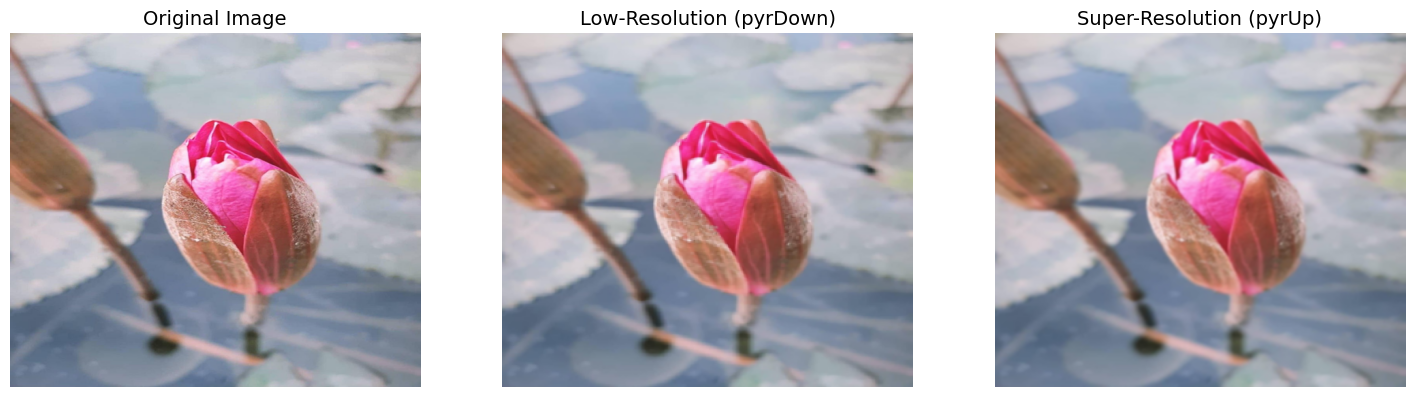

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (Replace 'bloodcells.png' with your actual image file)
image = cv2.imread('flower.png')

### 1. Downscale Image (Simulating Low-Resolution)
low_res = cv2.pyrDown(image)  # Reduce image size

### 2. Super-Resolution (Upscaling using pyrUp)
super_res = cv2.pyrUp(low_res)  # Upscale back

# Display Results
titles = ['Original Image', 'Low-Resolution (pyrDown)', 'Super-Resolution (pyrUp)']
images = [image, low_res, super_res]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, img, title in zip(axes, images, titles):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title, fontsize=14)
    ax.axis("off")

plt.show()


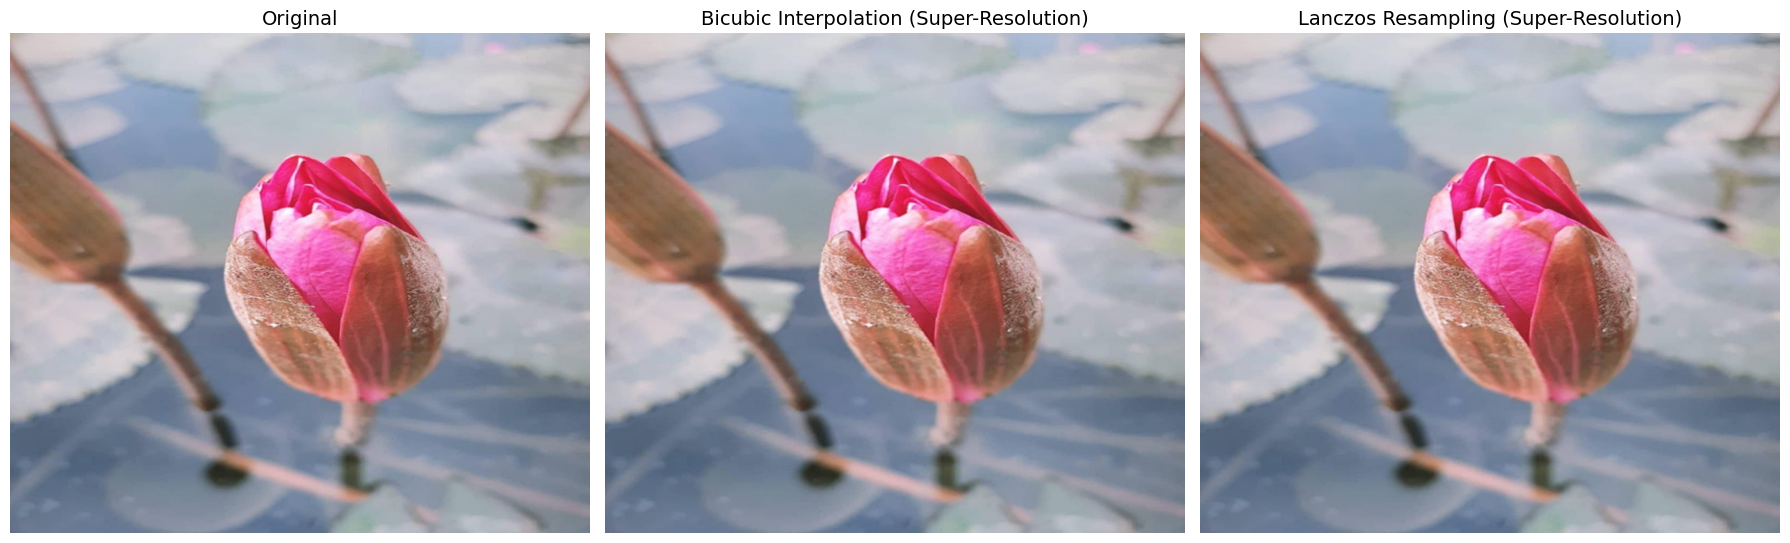

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (Replace 'image.jpg' with your actual image file)
image = cv2.imread('flower.png')

# Resize factor for super-resolution
scale_factor = 4  # Upscale by 4x

### 1. Bicubic Interpolation (Alternative to DNN)
bicubic_sr = cv2.resize(image, (image.shape[1] * scale_factor, image.shape[0] * scale_factor), interpolation=cv2.INTER_CUBIC)

### 2. Lanczos Resampling (Another high-quality alternative)
lanczos_sr = cv2.resize(image, (image.shape[1] * scale_factor, image.shape[0] * scale_factor), interpolation=cv2.INTER_LANCZOS4)

# Display Results
titles = ['Original', 'Bicubic Interpolation (Super-Resolution)', 'Lanczos Resampling (Super-Resolution)']
images = [image, bicubic_sr, lanczos_sr]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, img, title in zip(axes, images, titles):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title, fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()


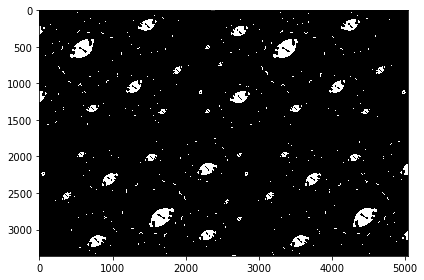

In [188]:
#apply multiple erosion
Eroded_Image = multi_erosion(binary, 2, x)
imshow(Eroded_Image)

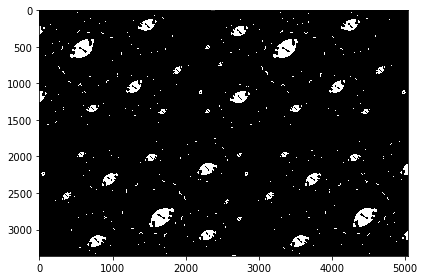

In [190]:
#we will apply the opening function to remove any minor noise left
opened_image = opening(Eroded_Image)
imshow(opened_image)

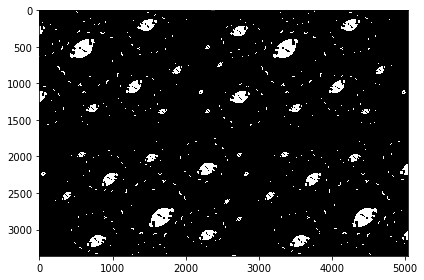

In [193]:
#we will apply dilation function to restore the size of original iage

diluted_image = multi_dilution(opened_image, 2, x)
imshow(diluted_image)

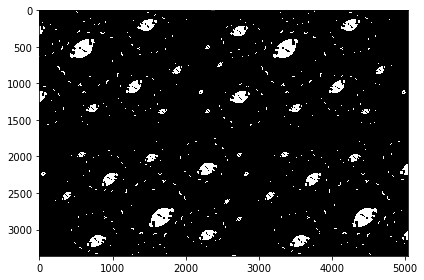

In [194]:
#make the image more clear by using area function
#it does not use a structural element but a deframed shape basis the threshold
morphed_image = area_opening(area_closing(diluted_image, 10), 10)
imshow(morphed_image)

# **Blob Detection using LoG, DoG, and DoH**

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.feature import blob_dog, blob_log, blob_doh

In [196]:
virus_morphed =morphed_image

Laplacian of Gaussian (LoG) on this binarized image
We will be only setting the min_sigma parameter on all methods. 
The rest will be the default parameter setting.

# Laplacian of Gaussian (LoG)

In [224]:
blobs = blob_log(virus_morphed, min_sigma=1,threshold=0.1)

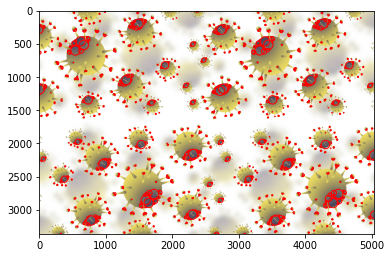

In [226]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

In [216]:
# Calculate the detected features in an image (blobs). This can have wider application and use cases
blobs[:, 2] = blobs[:, 2] * sqrt(2)
numrows = len(blobs)

In [217]:
print("blob counts",numrows)

blob counts 3948


# Difference of Gaussian (DoG)

In [218]:
#Difference of Gaussian (DoG)
blobs = blob_dog(virus_morphed, min_sigma=1,threshold=0.1)

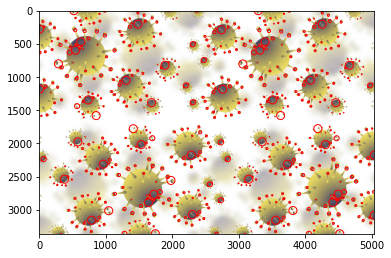

In [219]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

# Determinant of Hessian (DoH)

In [221]:
blobs = blob_doh(virus_morphed, min_sigma=1)

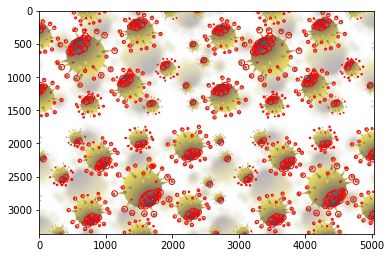

In [222]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import time
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit model input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize images
])

# Load CIFAR-100 dataset
train_dataset = datasets.CIFAR100(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR100(root='./data', train=False, transform=transform, download=True)

# Define DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


100%|██████████| 169M/169M [00:20<00:00, 8.21MB/s] 


In [4]:
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, 100)  # Adjust the final layer for CIFAR-100
alexnet = alexnet.to("cuda" if torch.cuda.is_available() else "cpu")


vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = nn.Linear(4096, 100)  # Adjust the final layer
vgg16 = vgg16.to("cuda" if torch.cuda.is_available() else "cpu")


c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGE

In [16]:
# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.train()
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        start_time = time.time()

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        epoch_time = time.time() - start_time

        print(f"Epoch {epoch+1}: Loss={epoch_loss:.4f}, Accuracy={epoch_acc:.2f}%, Time={epoch_time:.2f}s")

    return model


In [18]:
selected_classes = list(range(10))  # Pick first 10 classes (or choose randomly)

# Filter dataset to only include selected classes
train_filtered = [(img, label) for img, label in train_dataset if label in selected_classes]
test_filtered = [(img, label) for img, label in test_dataset if label in selected_classes]

# Create new datasets
train_dataset_reduced = torch.utils.data.TensorDataset(
    torch.stack([img for img, label in train_filtered]),
    torch.tensor([label for img, label in train_filtered])
)
test_dataset_reduced = torch.utils.data.TensorDataset(
    torch.stack([img for img, label in test_filtered]),
    torch.tensor([label for img, label in test_filtered])
)

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset_reduced, batch_size=16, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset_reduced, batch_size=16, shuffle=False, num_workers=2)


KeyboardInterrupt: 

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer_alexnet = optim.Adam(alexnet.parameters(), lr=0.0001)

print("\nTraining AlexNet...")
alexnet = train_model(alexnet, train_loader, criterion, optimizer_alexnet, epochs=5)



Training AlexNet...
Epoch 1: Loss=0.6154, Accuracy=80.26%, Time=97.97s
Epoch 2: Loss=0.2639, Accuracy=91.08%, Time=95.44s
Epoch 3: Loss=0.1409, Accuracy=95.32%, Time=109.68s
Epoch 4: Loss=0.1017, Accuracy=96.22%, Time=89.15s
Epoch 5: Loss=0.0704, Accuracy=97.74%, Time=90.43s


In [19]:
import numpy as np
from torch.utils.data import Subset

subset_size = int(0.1 * len(train_dataset))  # Use 10% of dataset
train_indices = np.random.choice(len(train_dataset), subset_size, replace=False)
test_indices = np.random.choice(len(test_dataset), int(0.1 * len(test_dataset)), replace=False)

train_subset = Subset(train_dataset, train_indices)
test_subset = Subset(test_dataset, test_indices)

train_loader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_subset, batch_size=32, shuffle=False, num_workers=0)


In [20]:
optimizer_vgg16 = optim.Adam(vgg16.parameters(), lr=0.0001)

print("\nTraining VGG16...")
vgg16 = train_model(vgg16, train_loader, criterion, optimizer_vgg16, epochs=5)



Training VGG16...


KeyboardInterrupt: 

In [21]:
# Evaluation function
def evaluate_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    correct = 0
    total = 0
    test_loss = 0.0
    criterion = nn.CrossEntropyLoss()
    start_time = time.time()

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_accuracy = 100 * correct / total
    test_loss = test_loss / len(test_loader)
    inference_time = time.time() - start_time

    return test_loss, test_accuracy, inference_time


In [22]:
alexnet_loss, alexnet_acc, alexnet_time = evaluate_model(alexnet, test_loader)
print(f"AlexNet: Loss={alexnet_loss:.4f}, Accuracy={alexnet_acc:.2f}%, Inference Time={alexnet_time:.2f}s")


AlexNet: Loss=10.3460, Accuracy=9.60%, Inference Time=9.73s
